<a href="https://colab.research.google.com/github/syedsajidhussain/ML-Assessment/blob/main/Brain_tumor_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [4]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from datetime import datetime
import cv2
from PIL import Image
from keras import backend, optimizers

In [ ]:
!ls

In [5]:
image_directory = '/content/drive/MyDrive/Dataset/images/'
mask_directory = '/content/drive/MyDrive/Dataset/masks/'


In [6]:
'''
import os

dir= "/content/drive/MyDrive/Dataset/masks/"

# List all files in the folder
files = os.listdir(dir)

# Sort the files
sorted_files = sorted(files)

# Rename the files in sorted order
for index, old_name in enumerate(sorted_files):
    file_extension = os.path.splitext(old_name)[1]
    new_name = f"img_{index + 1}{file_extension}"
    old_path = os.path.join(dir, old_name)
    new_path = os.path.join(dir, new_name)
    os.rename(old_path, new_path)
'''

In [6]:
SIZE = 128
image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.
mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.



In [7]:
images = os.listdir(image_directory)
for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
    if (image_name.split('.')[1] == 'tif'):
        #print(image_directory+image_name)
        image = cv2.imread(image_directory+image_name, 1)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image_dataset.append(np.array(image))

In [8]:
#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

masks = os.listdir(mask_directory)
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'tif'):
        image = cv2.imread(mask_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_dataset.append(np.array(image))


In [9]:
#Normalize images
image_dataset = np.array(image_dataset)/255.
#D not normalize masks, just rescale to 0 to 1.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)

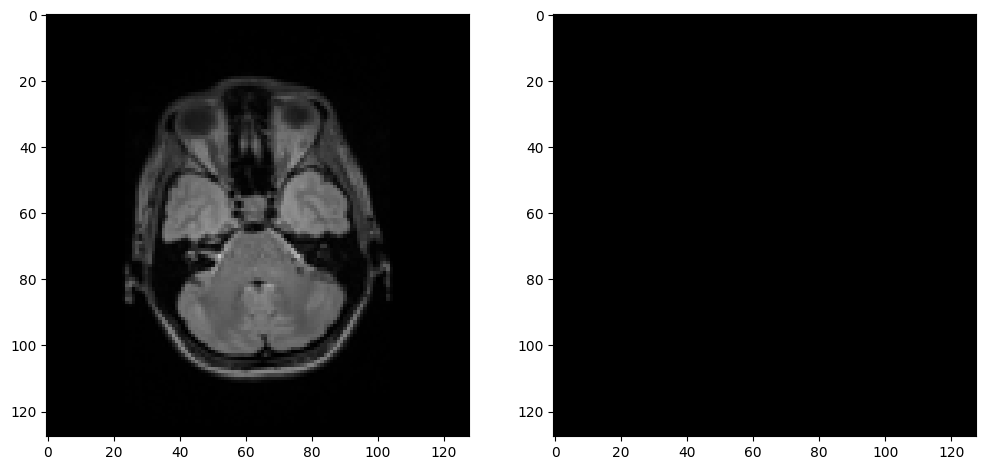

In [11]:
#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (128, 128, 3)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (128, 128)), cmap='gray')
plt.show()


In [12]:
#######################################
#Parameters for model

IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]
num_labels = 1  #Binary
input_shape = (IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)
batch_size = 8



In [13]:
!!pip install focal-loss

['Collecting focal-loss',
 '  Downloading focal_loss-0.0.7-py3-none-any.whl (19 kB)',
 'Requirement already satisfied: tensorflow>=2.2 in /usr/local/lib/python3.10/dist-packages (from focal-loss) (2.12.0)',
 'Requirement already satisfied: absl-py>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from tensorflow>=2.2->focal-loss) (1.4.0)',
 'Requirement already satisfied: astunparse>=1.6.0 in /usr/local/lib/python3.10/dist-packages (from tensorflow>=2.2->focal-loss) (1.6.3)',
 'Requirement already satisfied: flatbuffers>=2.0 in /usr/local/lib/python3.10/dist-packages (from tensorflow>=2.2->focal-loss) (23.5.26)',
 'Requirement already satisfied: gast<=0.4.0,>=0.2.1 in /usr/local/lib/python3.10/dist-packages (from tensorflow>=2.2->focal-loss) (0.4.0)',
 'Requirement already satisfied: google-pasta>=0.1.1 in /usr/local/lib/python3.10/dist-packages (from tensorflow>=2.2->focal-loss) (0.2.0)',
 'Requirement already satisfied: grpcio<2.0,>=1.24.3 in /usr/local/lib/python3.10/dist-packages 

In [14]:
#FOCAL LOSS AND DICE METRIC
#Focal loss helps focus more on tough to segment classes.
from focal_loss import BinaryFocalLoss

In [28]:
!ls

'Colab Notebooks'   Dataset   ISBI2023-One-Shot-WM-Tract-Segmentation   mrtrix3


In [15]:
!python Dataset/models.py

2023-08-29 14:23:27.152165: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-29 14:23:33.422656: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                   

In [16]:
from tensorflow.keras import models , layers, regularizers
from tensorflow.keras import backend as K

In [33]:
!cd

'Colab Notebooks'   Dataset   ISBI2023-One-Shot-WM-Tract-Segmentation   mrtrix3


In [17]:
#Try various models: Unet, Attention_UNet, and Attention_ResUnet
#Rename original python file from 224_225_226_models.py to models.py
from Dataset.models import Attention_ResUNet, UNet, Attention_UNet, dice_coef, dice_coef_loss, jacard_coef

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

In [4]:
!ls

 brain_Attention_UNet_50epochs_B_focal.hdf5
 brain_AttResUnet_50epochs_B_focal.hdf5
 brain_UNet_50epochs_B_focal.hdf5
'Colab Notebooks'
 Dataset
 ISBI2023-One-Shot-WM-Tract-Segmentation
 mrtrix3


In [5]:
#Try various models: Unet, Attention_UNet, and Attention_ResUnet
#Rename original python file from 224_225_226_models.py to models.py
from Dataset.models import Attention_ResUNet, UNet, Attention_UNet, dice_coef, dice_coef_loss, jacard_coef

'''
UNet
'''
unet_model = UNet(input_shape)
unet_model.compile(optimizer=Adam(lr = 1e-2), loss=BinaryFocalLoss(gamma=2),
              metrics=['accuracy', jacard_coef])


print(unet_model.summary())

start1 = datetime.now()
unet_history = unet_model.fit(X_train, y_train,
                    verbose=1,
                    batch_size = batch_size,
                    validation_data=(X_test, y_test ),
                    shuffle=False,
                    epochs=50)

stop1 = datetime.now()
#Execution time of the model
execution_time_Unet = stop1-start1
print("UNet execution time is: ", execution_time_Unet)

unet_model.save('brain_UNet_50epochs_B_focal.hdf5')

NameError: ignored

In [38]:
'''
Attention UNet
'''
att_unet_model = Attention_UNet(input_shape)

att_unet_model.compile(optimizer=Adam(lr = 1e-2), loss=BinaryFocalLoss(gamma=2),
              metrics=['accuracy', jacard_coef])


print(att_unet_model.summary())
start2 = datetime.now()
att_unet_history = att_unet_model.fit(X_train, y_train,
                    verbose=1,
                    batch_size = batch_size,
                    validation_data=(X_test, y_test ),
                    shuffle=False,
                    epochs=50)
stop2 = datetime.now()
#Execution time of the model
execution_time_Att_Unet = stop2-start2
print("Attention UNet execution time is: ", execution_time_Att_Unet)

att_unet_model.save('brain_Attention_UNet_50epochs_B_focal.hdf5')

Model: "Attention_UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 128, 128, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_38 (BatchN  (None, 128, 128, 64  256        ['conv2d_38[0][0]']              
 ormalization)                  )                                                    

In [18]:
#___________________________________________
'''
Attention Residual Unet
'''
att_res_unet_model = Attention_ResUNet(input_shape)

att_res_unet_model.compile(optimizer=Adam(lr = 1e-2), loss=BinaryFocalLoss(gamma=2),
              metrics=['accuracy', jacard_coef])


# att_res_unet_model.compile(optimizer=Adam(lr = 1e-3), loss='binary_crossentropy',
#               metrics=['accuracy', jacard_coef])

print(att_res_unet_model.summary())


start3 = datetime.now()
att_res_unet_history = att_res_unet_model.fit(X_train, y_train,
                    verbose=1,
                    batch_size = batch_size,
                    validation_data=(X_test, y_test ),
                    shuffle=False,
                    epochs=50)
stop3 = datetime.now()

#Execution time of the model
execution_time_AttResUnet = stop3-start3
print("Attention ResUnet execution time is: ", execution_time_AttResUnet)

att_res_unet_model.save('brain_AttResUnet_50epochs_B_focal.hdf5')

Model: "AttentionResUNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_19 (BatchN  (None, 128, 128, 64  256        ['conv2d_19[0][0]']              
 ormalization)                  )                                                  

In [19]:
# convert the history.history dict to a pandas DataFrame and save as csv for
# future plotting
import pandas as pd
unet_history_df = pd.DataFrame(unet_history.history)
att_unet_history_df = pd.DataFrame(att_unet_history.history)
att_res_unet_history_df = pd.DataFrame(att_res_unet_history.history)

with open('unet_history_df.csv', mode='w') as f:
    unet_history_df.to_csv(f)

with open('att_unet_history_df.csv', mode='w') as f:
    att_unet_history_df.to_csv(f)

with open('custom_code_att_res_unet_history_df.csv', mode='w') as f:
    att_res_unet_history_df.to_csv(f)


NameError: ignored

In [20]:
#Check history plots, one model at a time
history = unet_history
history = att_unet_history
history = att_res_unet_history

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
acc = history.history['jacard_coef']
#acc = history.history['accuracy']
val_acc = history.history['val_jacard_coef']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Jacard')
plt.plot(epochs, val_acc, 'r', label='Validation Jacard')
plt.title('Training and validation Jacard')
plt.xlabel('Epochs')
plt.ylabel('Jacard')
plt.legend()
plt.show()

In [ ]:
model = unet_model
model = att_unet_model
model = att_res_unet_model

model_path = "/content/drive/MyDrive/brain_UNet_50epochs_B_focal.hdf5"
model_path = "/content/drive/MyDrive/brain_Attention_UNet_50epochs_B_focal.hdf5"
model_path = "/content/drive/MyDrive/brain_AttResUnet_50epochs_B_focal.hdf5"
#Load one model at a time for testing.
model = tf.keras.models.load_model(model_path, compile=False)

In [ ]:
import random
test_img_number = random.randint(0, X_test.shape[0]-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]

test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img, cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

In [ ]:
#IoU for a single image
from tensorflow.keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(ground_truth[:,:,0], prediction)
print("Mean IoU =", IOU_keras.result().numpy())

In [ ]:
#Calculate IoU for all test images and average

import pandas as pd

IoU_values = []
for img in range(0, X_test.shape[0]):
    temp_img = X_test[img]
    ground_truth=y_test[img]
    temp_img_input=np.expand_dims(temp_img, 0)
    prediction = (model.predict(temp_img_input)[0,:,:,0] > 0.5).astype(np.uint8)

    IoU = MeanIoU(num_classes=n_classes)
    IoU.update_state(ground_truth[:,:,0], prediction)
    IoU = IoU.result().numpy()
    IoU_values.append(IoU)

    print(IoU)

In [ ]:
df = pd.DataFrame(IoU_values, columns=["IoU"])
df = df[df.IoU != 1.0]
mean_IoU = df.mean().values
print("Mean IoU is: ", mean_IoU)